# Import Package/Library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mengatur tema visualisasi seaborn
sns.set_theme()

# Membaca data dari file .csv

In [2]:
# Membaca file CSV 'Data_Negara_HELP.csv' ke dalam DataFrame 'country'
country = pd.read_csv('HELP_Datasets/Data_Negara_HELP.csv')

# Membaca file CSV 'gdp_per_capita.csv' ke dalam DataFrame 'gdp_capita'
gdp_capita = pd.read_csv('HELP_Datasets/gdp_per_capita.csv')

# Menampilkan lima baris pertama dari DataFrame 'country' untuk mengecek data
display(country.head())

# Menampilkan lima baris pertama dari DataFrame 'gdp_capita' untuk mengecek data
display(gdp_capita.head())

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13


,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,147.612227,147.014904,156.189192,182.243917,162.347592,180.214908,190.845484,192.337167,...,1736.166560,1713.899299,1703.596298,1549.037940,1431.778723,1573.063386,1574.978648,1530.059177,1359.618224,NaN
2,Afghanistan,AFG,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,137.594298,160.898434,...,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871,NaN
3,Africa Western and Central,AFW,107.932233,113.081647,118.831107,123.442888,131.854402,138.526332,144.326212,128.582470,...,1965.118485,2157.481149,2212.853135,1894.310195,1673.835527,1613.473553,1704.139603,1777.918672,1710.073363,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1776.166868,NaN


# Data Preparation

In [3]:
# Menghapus kolom 'Code' dan 'Unnamed: 65' dari DataFrame 'gdp_capita'
gdp_capita.drop(['Code', 'Unnamed: 65'], axis=1, inplace=True)

# Menghapus kolom 'Ekspor' dan 'Impor' dari DataFrame 'country'
country.drop(['Ekspor', 'Impor'], axis=1, inplace=True)

# Mengambil subset data 'gdp_capita' yang hanya berisi negara-negara yang ada di DataFrame 'country'
temp = gdp_capita[gdp_capita['Country Name'].isin(
    country['Negara'])].reset_index(drop=True)
# Menambahkan kolom 'GDPperkapita' ke DataFrame 'temp' yang berisi rata-rata gdp per kapita dari setiap tahun
temp['GDPperkapita'] = temp.mean(numeric_only=True, axis=1)

# Menggabungkan data dari DataFrame 'country' dan 'temp' berdasarkan nama negara dengan Inner Join
data = pd.merge(country, temp, left_on='Negara',
                right_on='Country Name', how='inner')

# Menghapus kolom yang tidak diperlukan dari DataFrame 'data'
data.drop(data.iloc[:, 7:-1].columns, axis=1, inplace=True)

# Tampilkan DataFrame 'data' setelah proses pengolahan
display(data)

,Negara,Kematian_anak,Kesehatan,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,7.58,1610,9.44,56.2,5.82,287.200843
1,Albania,16.6,6.55,9930,4.49,76.3,1.65,2338.374773
2,Algeria,27.3,4.17,12900,16.10,76.5,2.89,2166.696854
3,Angola,119.0,2.85,5900,22.40,60.1,6.16,1926.375416
4,Antigua and Barbuda,10.3,6.03,19100,1.44,76.8,2.13,9475.384262
...,...,...,...,...,...,...,...,...
150,Uruguay,10.6,8.35,17100,4.91,76.4,2.08,5574.773039
151,Uzbekistan,36.3,5.81,4240,16.50,68.8,2.34,1174.822649
152,Vanuatu,29.2,5.25,2950,2.62,63.0,3.50,1832.537250
153,Vietnam,23.3,6.84,4490,12.10,73.1,1.95,954.272643


# Handling Outliers


In [4]:
def outliers_handler(data, columns: list):
    for column in columns:
        # Menghitung nilai median
        median_val = data[column].median()

        # Menghitung batas IQR
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Menggantikan nilai outlier dengan nilai median
        data[column] = np.where((data[column] < lower_bound) | (
            data[column] > upper_bound), median_val, data[column])

    return data

# Binning Data

In [5]:
def binning_qcut(data, columns: list):
    # Membuat dictionary sementara untuk menyimpan hasil binning
    temp = {}

    # Label yang akan digunakan untuk kategori binning
    label = ['Rendah', 'Sedang', 'Tinggi']

    # Iterasi melalui setiap kolom yang akan di-binning dengan 3 kategori dan label
    for column in columns:
        temp[f'bin_{column}'] = pd.qcut(data[column], q=3, labels=label)

    # Menggabungkan hasil binning dengan DataFrame asli menggunakan pd.concat
    data = pd.concat([data, pd.DataFrame(temp)], axis=1)

    return data

In [6]:
# Memanggil fungsi outliers_handler untuk mengelola outliers pada data
data = outliers_handler(data, columns=data.iloc[:, 1:].columns.tolist())

# Memanggil fungsi binning_qcut untuk melakukan binning pada data
data = binning_qcut(data, columns=data.iloc[:, 1:].columns.tolist())

# Menampilkan hasil data setelah pengelolaan outliers dan binning
display(data)

,Negara,Kematian_anak,Kesehatan,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,bin_Kematian_anak,bin_Kesehatan,bin_Pendapatan,bin_Inflasi,bin_Harapan_hidup,bin_Jumlah_fertiliti,bin_GDPperkapita
0,Afghanistan,90.2,7.58,1610.0,9.44,56.2,5.82,287.200843,Tinggi,Sedang,Rendah,Tinggi,Rendah,Tinggi,Rendah
1,Albania,16.6,6.55,9930.0,4.49,76.3,1.65,2338.374773,Sedang,Sedang,Sedang,Sedang,Tinggi,Rendah,Sedang
2,Algeria,27.3,4.17,12900.0,16.10,76.5,2.89,2166.696854,Sedang,Rendah,Sedang,Tinggi,Tinggi,Sedang,Sedang
3,Angola,119.0,2.85,5900.0,5.14,60.1,6.16,1926.375416,Tinggi,Rendah,Sedang,Sedang,Rendah,Tinggi,Sedang
4,Antigua and Barbuda,10.3,6.03,19100.0,1.44,76.8,2.13,9475.384262,Rendah,Sedang,Tinggi,Rendah,Tinggi,Sedang,Tinggi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Uruguay,10.6,8.35,17100.0,4.91,76.4,2.08,5574.773039,Rendah,Tinggi,Tinggi,Sedang,Tinggi,Sedang,Tinggi
151,Uzbekistan,36.3,5.81,4240.0,16.50,68.8,2.34,1174.822649,Sedang,Sedang,Rendah,Tinggi,Sedang,Sedang,Rendah
152,Vanuatu,29.2,5.25,2950.0,2.62,63.0,3.50,1832.537250,Sedang,Rendah,Rendah,Sedang,Rendah,Tinggi,Sedang
153,Vietnam,23.3,6.84,4490.0,12.10,73.1,1.95,954.272643,Sedang,Sedang,Rendah,Tinggi,Sedang,Rendah,Rendah


# Analisis Korelasi

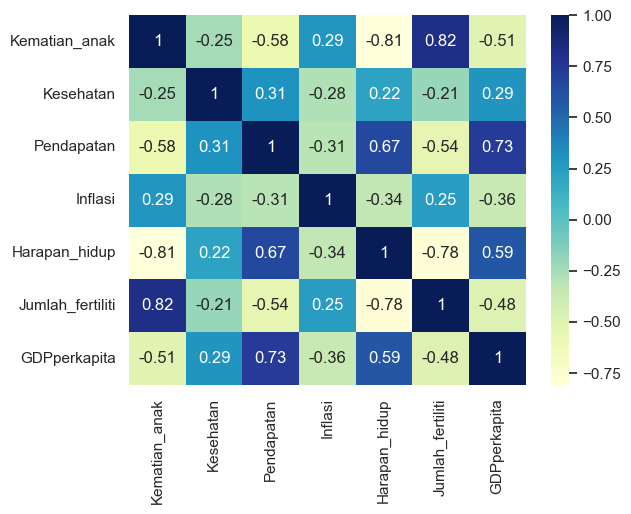

In [7]:
# Menghitung matriks korelasi antar variabel numerik dari DataFrame 'data'
_ = data.corr(numeric_only=True)

# membuat heatmap dari matriks korelasi
sns.heatmap(_, annot=True, cmap='YlGnBu')

# Menampilkan plot heatmap
plt.show()

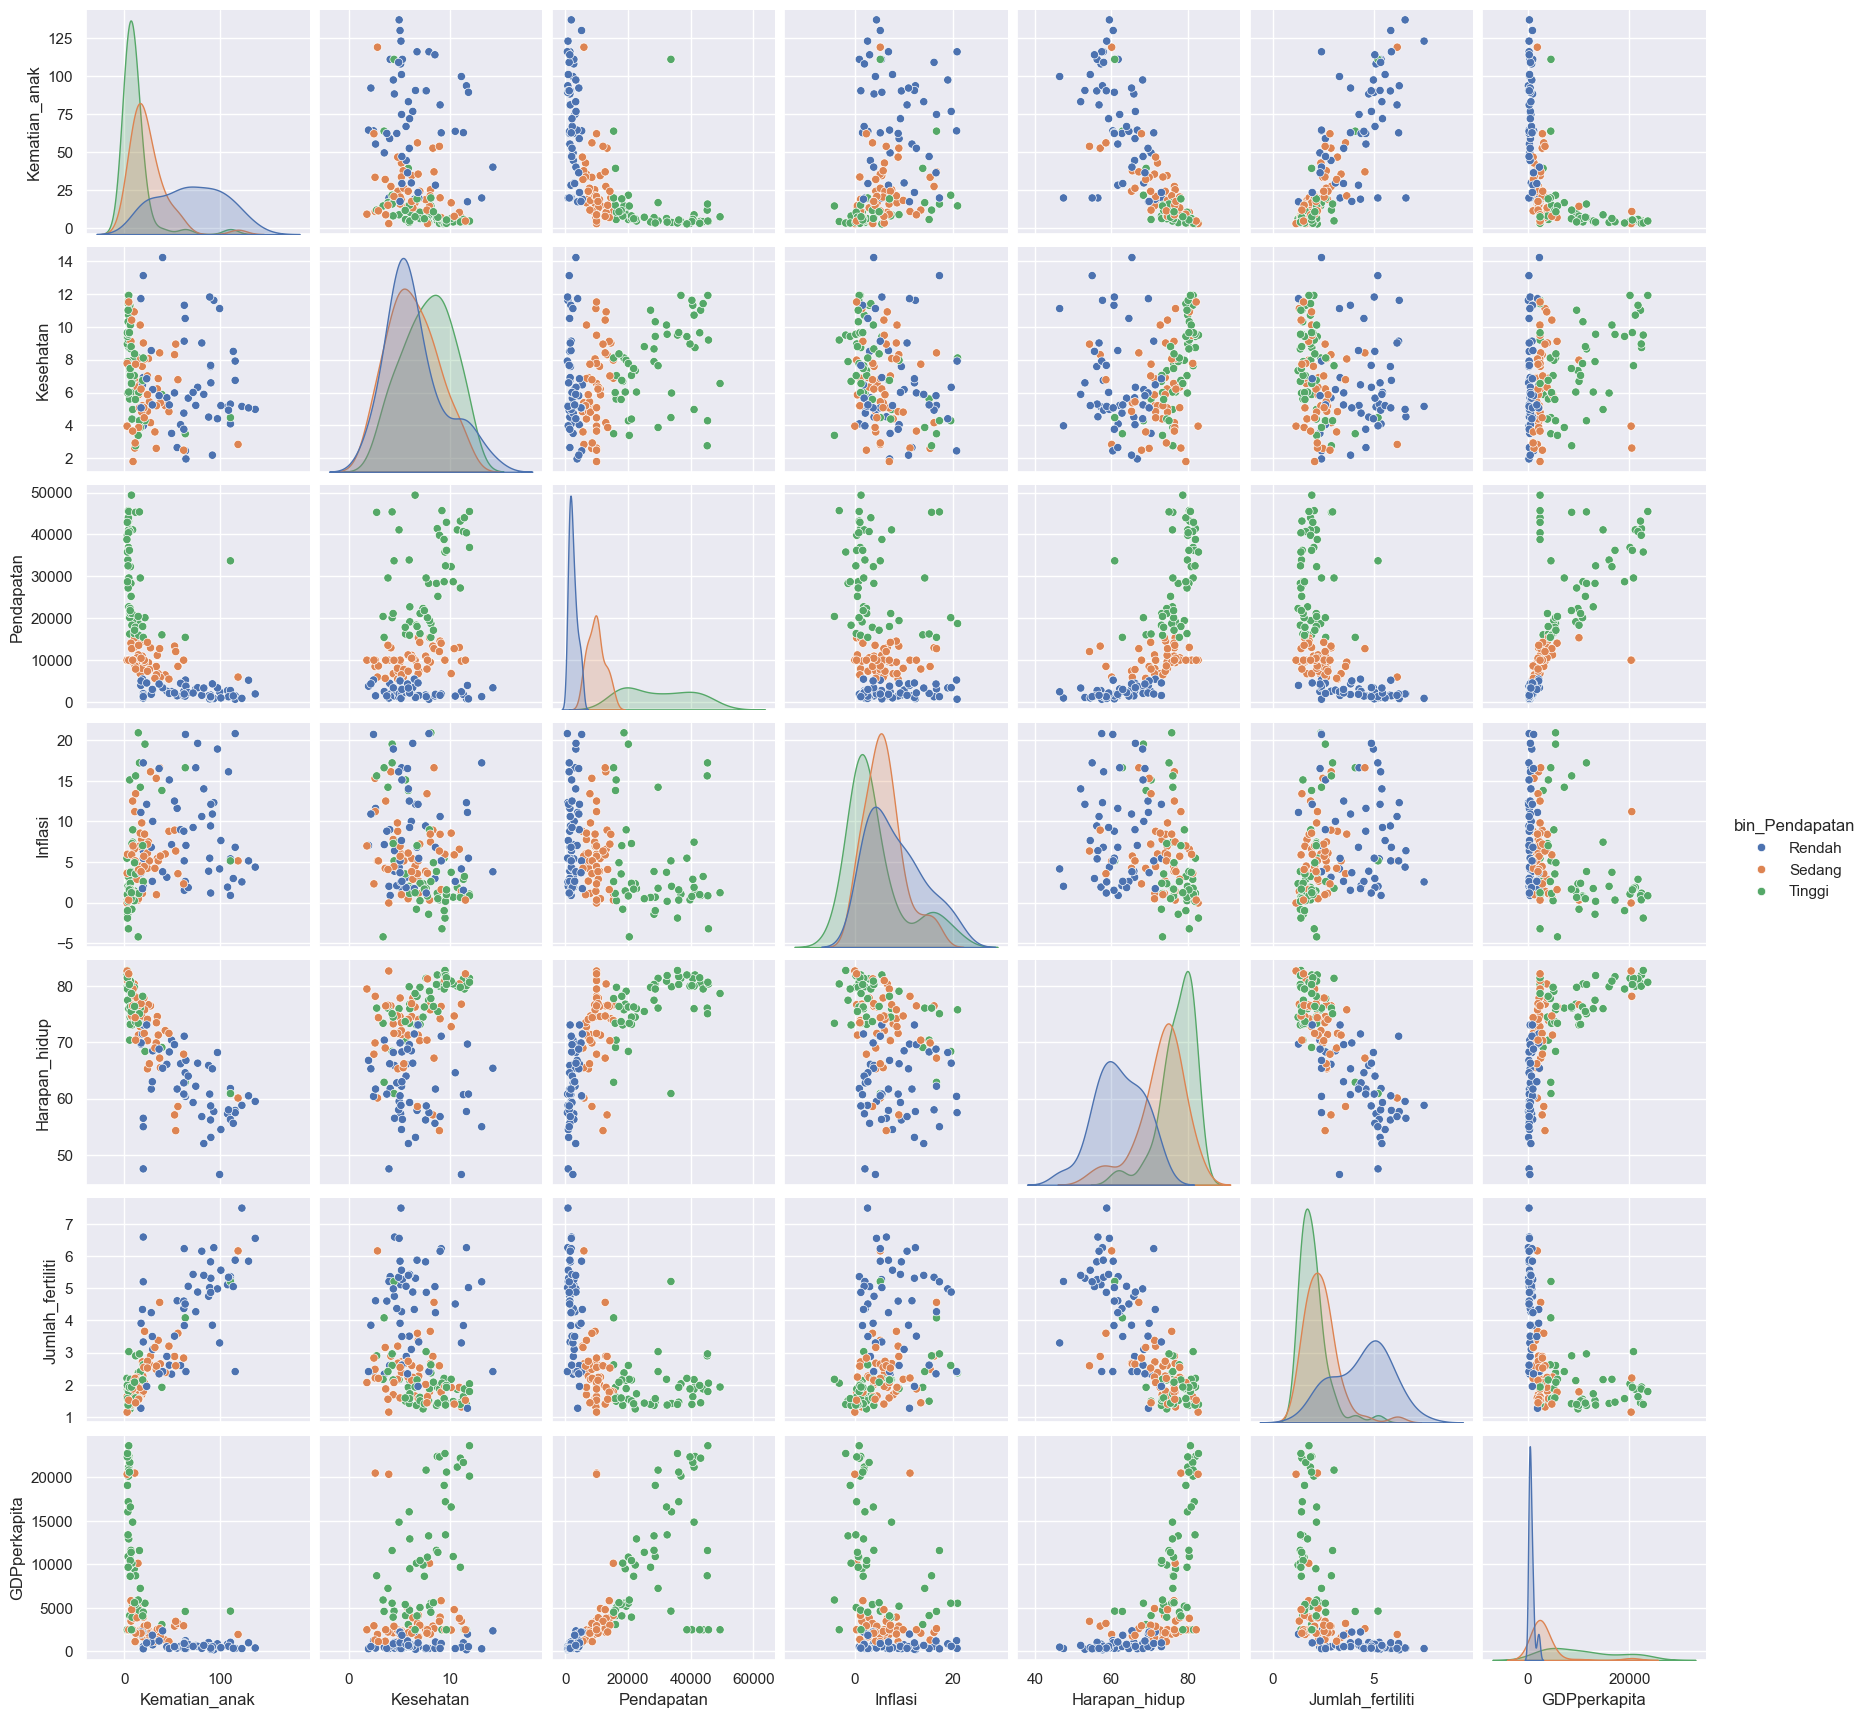

In [8]:
# Membuat pairplot dari dengan pemisahan warna berdasarkan kategori 'bin_Pendapatan'
sns.pairplot(data, hue='bin_Pendapatan')

# Menampilkan plot pairplot
plt.show()

# Data Selection

Dari data Heatmap dan Pairplot diatas, dapat disimpulkan bahwa kriteria-kriteria yang dapat difokuskan:
- Inflasi
- Pendapatan
- Kesehatan
- Harapan Hidup
- Kematian Anak
- GDP per kapita

In [9]:
# Memilih data berdasarkan kriteria yang difokuskan
selected_data = data[
    (data['bin_Kesehatan'] == 'Rendah') &
    (data['bin_Pendapatan'] == 'Rendah') &
    (data['bin_Harapan_hidup'] == 'Rendah') &
    (data['bin_GDPperkapita'] == 'Rendah') &
    (data['bin_Inflasi'] == 'Tinggi') &
    (data['bin_Kematian_anak'] == 'Tinggi') 
]

# Menampilkan data yang telah dipilih
display(selected_data)

,Negara,Kematian_anak,Kesehatan,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,bin_Kematian_anak,bin_Kesehatan,bin_Pendapatan,bin_Inflasi,bin_Harapan_hidup,bin_Jumlah_fertiliti,bin_GDPperkapita
35,"Congo, Rep.",63.9,2.46,5190.0,20.70,60.4,2.41,1209.463049,Tinggi,Rendah,Rendah,Tinggi,Rendah,Sedang,Rendah
46,Eritrea,55.2,2.66,1420.0,11.60,61.7,4.61,364.542009,Tinggi,Rendah,Rendah,Tinggi,Rendah,Tinggi,Rendah
54,Ghana,74.7,5.22,3060.0,16.60,62.2,4.27,663.129174,Tinggi,Rendah,Rendah,Tinggi,Rendah,Tinggi,Rendah
58,Guinea,109.0,4.93,1190.0,16.10,58.0,5.34,573.134162,Tinggi,Rendah,Rendah,Tinggi,Rendah,Tinggi,Rendah
64,India,58.8,4.05,4410.0,8.98,66.2,2.60,575.534284,Tinggi,Rendah,Rendah,Tinggi,Rendah,Sedang,Rendah
85,Madagascar,62.2,3.77,1390.0,8.79,60.8,4.60,337.908511,Tinggi,Rendah,Rendah,Tinggi,Rendah,Tinggi,Rendah
91,Mauritania,97.4,4.41,3320.0,18.90,68.2,4.98,848.030521,Tinggi,Rendah,Rendah,Tinggi,Rendah,Tinggi,Rendah
98,Mozambique,101.0,5.21,918.0,7.64,54.5,5.56,408.658289,Tinggi,Rendah,Rendah,Tinggi,Rendah,Tinggi,Rendah
99,Myanmar,64.4,1.97,3720.0,7.04,66.8,2.41,284.902061,Tinggi,Rendah,Rendah,Tinggi,Rendah,Sedang,Rendah
108,Pakistan,92.1,2.20,4280.0,10.90,65.3,3.85,528.776540,Tinggi,Rendah,Rendah,Tinggi,Rendah,Tinggi,Rendah


In [10]:
# Menghitung jumlah nilai numerik dari kolom-kolom yang dipilih, diurutkan secara ascending dan mengambil indeksnya
ranked_countries = selected_data.sum(
    numeric_only=True, axis=1).sort_values().index

# Menampilkan lima negara teratas berdasarkan peringkat
for i, country in enumerate(ranked_countries[:5], start=1):
    # Menampilkan informasi mengenai negara tersebut
    print(f"{i}. {data.iloc[country, 0]} - Memiliki Pendapatan {data.iloc[country, 3]:.0f} dengan angka Kesehatan {data.iloc[country, 2]} dan Harapan Hidup {data.iloc[country, 5]:.0f} tahun")

1. Mozambique - Memiliki Pendapatan 918 dengan angka Kesehatan 5.21 dan Harapan Hidup 54 tahun
2. Madagascar - Memiliki Pendapatan 1390 dengan angka Kesehatan 3.77 dan Harapan Hidup 61 tahun
3. Eritrea - Memiliki Pendapatan 1420 dengan angka Kesehatan 2.66 dan Harapan Hidup 62 tahun
4. Guinea - Memiliki Pendapatan 1190 dengan angka Kesehatan 4.93 dan Harapan Hidup 58 tahun
5. Ghana - Memiliki Pendapatan 3060 dengan angka Kesehatan 5.22 dan Harapan Hidup 62 tahun
